In [1]:
 #Import necessary Libraries or install if not yet installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
os.chdir('..')
get_ipython().run_line_magic('matplotlib', 'inline')
import json
import glob

# Data Read

In [2]:
import pandas as pd

# Specify the full path to the CSV file
file_path = r'C:\Users\user\Downloads\Acute Respiratory Infection\ARI_banglasesh.csv'

# Read the CSV file
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(data.head())
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


C:\Users\user\AppData\Local\Temp\ipykernel_16936\1935089544.py:8: DtypeWarning: Columns (126,127,135,136,137,145,147,161,309,310,311,312,313,314,315,366,367,415,449,453,462,463,472,473,474,493,529,536,579,581,583,585,586,587,611,710,711,714,715,718,719,723,727,731,735,743,744,772,773,777,781,784,785,789,793,812,813,817,821,824,825,829,833,960,961,962,963,964,965,966,967,968,982,983,984,985,997,999,1040,1041,1048,1050,1065,1066,1069,1070,1073,1077,1098,1173,1174,1175,1176,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


File loaded successfully!


,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,s630t,s630u,s630v,s630w,s630y,breathing,blockage,blockage_cat,breathing_cat,ARI
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,1. yes,1. yes,0. no,0. no,0. no,0. no,NaN,NaN,no,no
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,0. no,NaN,NaN,no,no
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,0. no,0. no,0. no,0. no,0. no,0. no,NaN,NaN,no,no
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,0. no,0. no,0. no,0. no,0. no,0. no,NaN,NaN,no,no


# EDA

Value Counts:
 ARI
no     7355
yes    1042
Name: count, dtype: int64

Proportions:
 ARI
no     0.875908
yes    0.124092
Name: proportion, dtype: float64


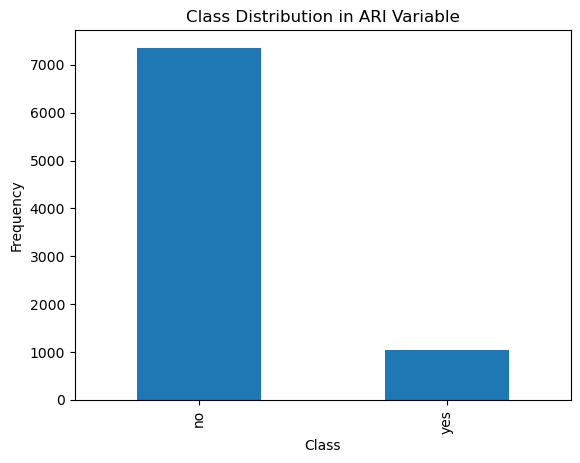

In [3]:
# Get value counts
target_counts = data['ARI'].value_counts()
print("Value Counts:\n", target_counts)

# Calculate proportions
target_proportions = data['ARI'].value_counts(normalize=True)
print("\nProportions:\n", target_proportions)

# Visualize the distribution
target_counts.plot(kind='bar')
plt.title('Class Distribution in ARI Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [4]:
unique_values = data['v113'].unique()

# Print unique values
print(unique_values)

['21. tube well or borehole' '97. not a dejure resident' '51. rainwater'
 '43. river/dam/lake/ponds/stream/canal/irrigation channel'
 '11. piped into dwelling' '14. public tap/standpipe'
 '13. piped to neighbor' '12. piped to yard/plot' '32. unprotected well'
 '31. protected well' '62. cart with small tank' '71. bottled water'
 '61. tanker truck']


In [5]:
# Check for missing values in the 'water' column and count them
missing_count = data.isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: caseid              0
hidxa               0
v000                0
v001                0
v002                0
                 ... 
breathing         361
blockage         7706
blockage_cat     7706
breathing_cat     361
ARI               362
Length: 1232, dtype: int64


In [6]:
category_mapping = {
    '41. protected spring': 0,
    '14. public tap/standpipe': 0,
    '97. not a dejure resident': 2,
    '21. tube well or borehole': 0,
    '32. unprotected well': 1,
    '31. protected well': 0,
    '42. unprotected spring': 1,
    '51. rainwater': 1,
    '13. piped to neighbor': 2,
    '11. piped into dwelling': 2,
    '43. river/dam/lake/ponds/stream/canal/irrigation channel': 1,
    '12. piped to yard/plot': 1,
    '71. bottled water': 2,
    '61. tanker truck': 2,
    '62. cart with small tank': 1,
    '96. other': 2
}

# Create a new column 'water' with the mapped categories
data['water'] = data['v113'].map(category_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...   s630u  s630v  s630w  s630y  breathing  blockage blockage_cat  \
0  ...  1. yes  0. no  0. no  0. no      0. no       NaN          NaN   
1  ...     NaN    NaN    NaN    NaN      0. no       NaN          NaN   
2  ...   0. no  0. no  0. no  0. no      0. no       NaN          NaN   
3  ...     NaN    NaN    NaN    NaN        NaN       NaN          NaN   
4  ...   0. no  0. no  0. no  0. no      0. no       NaN          NaN   

  breathing_cat  ARI  water  
0            no   no      0  
1            no   no      0  
2 

In [7]:
# Check for missing values in the 'water' column and count them
missing_count = data['water'].isnull().sum()

print("Number of missing values in the 'water' column:", missing_count)


Number of missing values in the 'water' column: 0


In [8]:
unique_values = data['b8'].unique()

# Print unique values
print(unique_values)

[ 0. nan  2.  3.  4.  1.]


In [9]:
unique_values = data['v025'].unique()

# Print unique values
print(unique_values)

['2. rural' '1. urban']


In [10]:
import pandas as pd
v025_mapping = {
    '2. rural': 2,
    '1. urban': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Type of place of residence'] = data['v025'].map(v025_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630v  s630w  s630y  breathing  blockage  blockage_cat breathing_cat  \
0  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   
1  ...    NaN    NaN    NaN      0. no       NaN           NaN            no   
2  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   
3  ...    NaN    NaN    NaN        NaN       NaN           NaN           NaN   
4  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   

   ARI water  Type of place of residence  
0   no 

In [11]:
# Check for missing values in the 'water' column and count them
missing_count = data['Type of place of residence'].isnull().sum()

print("Number of missing values in the 'Type of place of residence' column:", missing_count)

Number of missing values in the 'Type of place of residence' column: 0


In [12]:
unique_values = data['v106'].unique()

# Print unique values
print(unique_values)

['3. higher' '1. primary' '2. secondary' '0. no education']


In [13]:
import pandas as pd

v106_mapping = {
    '0. no education': 0,
    '1. primary': 1,
    '2. secondary':2,
    '3. higher':3
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Highest eduction level'] = data['v106'].map(v106_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630w  s630y  breathing  blockage  blockage_cat  breathing_cat  ARI  \
0  ...  0. no  0. no      0. no       NaN           NaN             no   no   
1  ...    NaN    NaN      0. no       NaN           NaN             no   no   
2  ...  0. no  0. no      0. no       NaN           NaN             no   no   
3  ...    NaN    NaN        NaN       NaN           NaN            NaN  NaN   
4  ...  0. no  0. no      0. no       NaN           NaN             no   no   

  water Type of place of residence  Highest eduction lev

In [14]:
# Check for missing values in the 'water' column and count them
missing_count = data['Highest eduction level'].isnull().sum()

print("Number of missing values in the 'Highest eduction level' column:", missing_count)


Number of missing values in the 'Highest eduction level' column: 0


In [15]:
unique_values = data['v119'].unique()

# Print unique values
print(unique_values)

['0. no' '7. not a dejure resident' '1. yes']


In [16]:
import pandas as pd

v119_mapping = {
    '0. no': 0,
    '1. yes': 1,
    '7. not a dejure resident':2
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Household has electricity'] = data['v119'].map(v119_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630y  breathing  blockage  blockage_cat  breathing_cat  ARI water  \
0  ...  0. no      0. no       NaN           NaN             no   no     0   
1  ...    NaN      0. no       NaN           NaN             no   no     0   
2  ...  0. no      0. no       NaN           NaN             no   no     2   
3  ...    NaN        NaN       NaN           NaN            NaN  NaN     2   
4  ...  0. no      0. no       NaN           NaN             no   no     0   

  Type of place of residence Highest eduction level  Household

In [17]:
# Check for missing values in the 'water' column and count them
missing_count = data['Household has electricity'].isnull().sum()

print("Number of missing values in the 'Household has electricity' column:", missing_count)


Number of missing values in the 'Household has electricity' column: 0


In [18]:
unique_values = data['v190'].unique()

# Print unique values
print(unique_values)

['1. poorest' '2. poorer' '3. middle' '4. richer' '5. richest']


In [19]:
import pandas as pd

v190_mapping = {
    '1. poorest': 1,
    '2. poorer': 2,
    '3. middle':3,
    '4. richer':4,
    '5. richest':5
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Wealth index combined'] = data['v190'].map(v190_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  breathing  blockage  blockage_cat  breathing_cat  ARI  water  \
0  ...      0. no       NaN           NaN             no   no      0   
1  ...      0. no       NaN           NaN             no   no      0   
2  ...      0. no       NaN           NaN             no   no      2   
3  ...        NaN       NaN           NaN            NaN  NaN      2   
4  ...      0. no       NaN           NaN             no   no      0   

  Type of place of residence Highest eduction level Household has electricity  \
0                

In [20]:
# Check for missing values in the 'water' column and count them
missing_count = data['Wealth index combined'].isnull().sum()

print("Number of missing values in the column:", missing_count)


Number of missing values in the column: 0


In [21]:
unique_values = data['v404'].unique()

# Print unique values
print(unique_values)

['1. yes' '0. no']


In [22]:
v404_mapping = {
   '0. no': 0,
   '1. yes': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Current breastfeeding'] = data['v404'].map(v404_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  blockage  blockage_cat  breathing_cat  ARI  water  \
0  ...       NaN           NaN             no   no      0   
1  ...       NaN           NaN             no   no      0   
2  ...       NaN           NaN             no   no      2   
3  ...       NaN           NaN            NaN  NaN      2   
4  ...       NaN           NaN             no   no      0   

   Type of place of residence Highest eduction level  \
0                           2                      3   
1                           2                      1

In [23]:
# Check for missing values in the 'water' column and count them
missing_count = data['Current breastfeeding'].isnull().sum()

print("Number of missing values in the  column:", missing_count)


Number of missing values in the  column: 0


In [24]:
unique_values = data['b4'].unique()

# Print unique values
print(unique_values)

['1. male' '2. female']


In [25]:
import pandas as pd

b4_mapping = {
    '1. male': 1,
    '2. female': 2,
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Sex of child'] = data['b4'].map(b4_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  blockage_cat  breathing_cat  ARI  water  Type of place of residence  \
0  ...           NaN             no   no      0                           2   
1  ...           NaN             no   no      0                           2   
2  ...           NaN             no   no      2                           2   
3  ...           NaN            NaN  NaN      2                           2   
4  ...           NaN             no   no      0                           2   

   Highest eduction level Household has electricity Weal

In [26]:
# Check for missing values in the 'water' column and count them
missing_count = data['Sex of child'].isnull().sum()

print("Number of missing values in the column:", missing_count)


Number of missing values in the column: 0


In [27]:
unique_values = data['b9'].unique()

# Print unique values
print(unique_values)

['0. respondent' nan '4. lives elsewhere']


In [28]:

b9_mapping = {
    '0. respondent': 0,
    '4. lives elsewhere': 4
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Child lives with whom'] = data['b9'].map(b9_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  breathing_cat  ARI  water  Type of place of residence  \
0  ...             no   no      0                           2   
1  ...             no   no      0                           2   
2  ...             no   no      2                           2   
3  ...            NaN  NaN      2                           2   
4  ...             no   no      0                           2   

   Highest eduction level  Household has electricity Wealth index combined  \
0                       3                          0          

In [29]:
# Check for missing values in the 'water' column and count them
missing_count = data['Child lives with whom'].isnull().sum()

print("Number of missing values in the 'Child lives with whom ' column:", missing_count)


Number of missing values in the 'Child lives with whom ' column: 357


In [30]:
unique_values = data['v161'].unique()

# Print unique values
print(unique_values)

['8. wood' '97. not a dejure resident' '2. lpg' '10. agricultural crop'
 '11. animal dung' nan '9. straw/shrubs/grass' '96. other'
 '95. no food cooked in house' '3. natural gas' '1. electricity'
 '4. biogas' '7. charcoal' '5. kerosene']


In [31]:
# Create a dictionary to map the new values to the four categories
fuel_mapping = {
    '1. electricity': 1,
    '2. lpg': 4,
    '3. natural gas': 4,
    '4. biogas': 4,
    '5. kerosene': 4,
    '7. charcoal': 3,
    '8. wood': 2,
    '9. straw/shrubs/grass': 4,
    '10. agricultural crop': 4,
    '11. animal dung': 4,
    '95. no food cooked in house': 4,
    '96. other': 4,
    '97. not a dejure resident': 4
}
# Create a new column 'Fuel Category' with the mapped values
data['Type of cooking fuel'] = data['v161'].map(fuel_mapping)

# Print the DataFrame to verify the new column
print(data)

               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  ARI  water  Type

In [32]:
# Check for missing values in the 'water' column and count them
missing_count = data['Type of cooking fuel'].isnull().sum()

print("Number of missing values in the 'Type of cooking fuel' column:", missing_count)


Number of missing values in the 'Type of cooking fuel' column: 6


In [33]:
# Get the frequency counts of the 'Type of cooking fuel' column
fuel_frequency = data['Type of cooking fuel'].value_counts()

# Print the frequency counts
print(fuel_frequency)

Type of cooking fuel
4.0    5004
2.0    3696
1.0      47
3.0       6
Name: count, dtype: int64


In [34]:
unique_values = data['v116'].unique()

# Print unique values
print(unique_values)

['23. pit latrine without slab/open pit' '97. not a dejure resident'
 '43. hanging toilet/latrine' '22. pit latrine with slab'
 '21. ventilated improved pit latrine (vip)' '12. flush to septic tank'
 '13. flush to pit latrine' '14. flush to somewhere else'
 "15. flush, don't know where" '31. no facility/bush/field'
 '11. flush to piped sewer system']


In [35]:
# Create a dictionary to map the new values to the three categories
toilet_mapping = {
    '11. flush to piped sewer system': 2,
    '12. flush to septic tank': 2,
    '13. flush to pit latrine': 2,
    '21. ventilated improved pit latrine (vip)': 2,
    '22. pit latrine with slab': 2,
    '41. composting toilet': 2,
    '14. flush to somewhere else': 1,
    "15. flush, don't know where": 1,
    '23. pit latrine without slab/open pit': 1,
    '31. no facility/bush/field': 1,
    '42. bucket toilet': 1,
    '43. hanging toilet/latrine': 1,
    '96. other': 3,
    '97. not a dejure resident': 3
}

# Create a new column 'Toilet Category' with the mapped values
data['Type of toilet facility'] = data['v116'].map(toilet_mapping)

# Print the DataFrame to verify the new column
print(data)


               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  water  Type of p

In [36]:
# Check for missing values in the 'water' column and count them
missing_count = data['Type of toilet facility'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [37]:
unique_values = data['v714'].unique()

# Print unique values
print(unique_values)

['0. no' '1. yes']


In [38]:
v714_mapping = {
   '0. no': 0,
   '1. yes': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Occupation'] = data['v714'].map(v714_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Type of place of residence  Highest eduction level  \
0  ...                           2                       3   
1  ...                           2                       1   
2  ...                           2                       2   
3  ...                           2                       2   
4  ...                           2                       1   

   Household has electricity  Wealth index combined  Current breastfeeding  \
0                          0                      1                      1   
1 

In [39]:
# Check for missing values in the 'water' column and count them
missing_count = data['Occupation'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [40]:
unique_values = data['h43'].unique()

# Print unique values
print(unique_values)

['0. no' nan '1. yes' "8. don't know"]


In [41]:
h43_mapping = {
   '0. no': 0,
   '1. yes': 1,
    "8. don't know":0
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Drug'] = data['h43'].map(h43_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Highest eduction level  Household has electricity  \
0  ...                       3                          0   
1  ...                       1                          0   
2  ...                       2                          2   
3  ...                       2                          2   
4  ...                       1                          0   

   Wealth index combined  Current breastfeeding  Sex of child  \
0                      1                      1             1   
1                      1          

In [42]:
# Check for missing values in the 'water' column and count them
missing_count = data['Drug'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 361


In [43]:
unique_values = data['v218'].unique()

# Print unique values
print(unique_values)

[ 1  4  3  2  0  5  6  8  7 10  9]


In [44]:
# Define a function to categorize the values
def categorize_children(value):
    if value <= 3:
        return 0
    elif value <= 6:
        return 1
    else:
        return 2

# Apply the function to the column v218 and create a new column
data['Number of living children'] = data['v218'].apply(categorize_children)

# Display the first few rows of the DataFrame to verify the changes
data.head()

,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Household has electricity,Wealth index combined,Current breastfeeding,Sex of child,Child lives with whom,Type of cooking fuel,Type of toilet facility,Occupation,Drug,Number of living children
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,0,1,1,1,0.0,2.0,1,0,0.0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,0,1,1,1,0.0,2.0,1,0,0.0,1
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,2,2,1,1,0.0,4.0,3,0,0.0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,2,2,1,2,NaN,4.0,3,0,NaN,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,0,1,1,1,0.0,2.0,1,0,1.0,0


In [45]:
# Check for missing values in the 'water' column and count them
missing_count = data['Number of living children'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [46]:
unique_values = data['h11'].unique()

# Print unique values
print(unique_values)

['0. no' nan '2. yes, last two weeks' "8. don't know"]


In [47]:
h11_mapping = {
   '0. no': 0,
   '2. yes, last two weeks': 1,
    "8. don't know":0
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Had diarrhea'] = data['h11'].map(h11_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Wealth index combined  Current breastfeeding  Sex of child  \
0  ...                      1                      1             1   
1  ...                      1                      1             1   
2  ...                      2                      1             1   
3  ...                      2                      1             2   
4  ...                      1                      1             1   

   Child lives with whom  Type of cooking fuel  Type of toilet facility  \
0                    0.0           

In [48]:
# Check for missing values in the 'water' column and count them
missing_count = data['Had diarrhea'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 361


In [49]:
unique_values = data['m4'].unique()

# Print unique values
print(unique_values)

['95. still breastfeeding' '94. never breastfed' nan '18' '15' '27' '30'
 '4' '34' '24' '3' '2' '22' '29' '26' '23' '11' '12' '16' '0' '28' '14'
 '31' '5' '10' '25' '1' '17' '9' '21' '32' '20' '19' '6' '13' '8' '33' '7'
 '35']


In [50]:
m4_mapping = {
    '95. still breastfeeding': 0,
    '94. never breastfed': 1,
    # Map the rest of the values to 2
    '18': 2, '15': 2, '27': 2, '30': 2, '4': 2, '34': 2, '24': 2, '3': 2,
    '2': 2, '22': 2, '29': 2, '26': 2, '23': 2, '11': 2, '12': 2, '16': 2,
    '0': 2, '28': 2, '14': 2, '31': 2, '5': 2, '10': 2, '25': 2, '1': 2,
    '17': 2, '9': 2, '21': 2, '32': 2, '20': 2, '19': 2, '6': 2, '13': 2,
    '8': 2, '33': 2, '7': 2, '35': 2
}


# Create a new column 'Typeof place of residence' with the mapped values
data['Duration of breastfeeding'] = data['m4'].map(m4_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Current breastfeeding  Sex of child  Child lives with whom  \
0  ...                      1             1                    0.0   
1  ...                      1             1                    0.0   
2  ...                      1             1                    0.0   
3  ...                      1             2                    NaN   
4  ...                      1             1                    0.0   

   Type of cooking fuel  Type of toilet facility  Occupation Drug  \
0                   2.0                  

In [51]:
# Check for missing values in the 'water' column and count them
missing_count = data['Duration of breastfeeding'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 3766


In [52]:
unique_values = data['h34'].unique()

# Print unique values
print(unique_values)

['0. no' "8. don't know" nan '1. yes']


In [53]:
# Create a dictionary to map the values
h34_mapping = {
   '0. no': 0,
   '1. yes': 1,
   "8. don't know": 0
}

# Create a new column 'Vitamin A supplement' with the mapped values
data['Vitamin A supplement'] = data['h34'].map(h34_mapping)

# Print the first few rows to verify the new column
print(data.head())



            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Sex of child  Child lives with whom  Type of cooking fuel  \
0  ...             1                    0.0                   2.0   
1  ...             1                    0.0                   2.0   
2  ...             1                    0.0                   4.0   
3  ...             2                    NaN                   4.0   
4  ...             1                    0.0                   2.0   

   Type of toilet facility  Occupation  Drug Number of living children  \
0                        1           0   0

In [54]:
# Check for missing values in the 'water' column and count them
missing_count = data['Vitamin A supplement'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 360


In [55]:
unique_values = data['b8'].unique()

# Print unique values
print(unique_values)

[ 0. nan  2.  3.  4.  1.]


In [56]:
# Copy the 'b8' column and rename it to 'Age of child'
data['Age of child'] = data['b8']

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data)


Updated DataFrame:
               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      .

In [57]:
# Check for missing values in the 'water' column and count them
missing_count = data['Age of child'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 357


In [58]:
unique_values = data['hw70'].unique()

# Print unique values
print(unique_values)

['-59' '12' '-53' nan '-208' '-291' '-48' '-21' '-108' '-111' '-138'
 '-227' '-137' '24' '-297' '-12' '18' '-177' '-145' '-182' '-240' '-114'
 '-207' '-205' '-140' '-22' '-17' '94' '-75' '-93' '-252' '-157' '-20'
 '-339' '-123' '-61' '-133' '-120' '10' '248' '-38' '-92' '-199' '-76'
 '-368' '102' '-465' '-412' '-45' '-30' '-116' '135' '-65' '-163' '-198'
 '-235' '-220' '-80' '-268' '-269' '-166' '-129' '89' '-312' '-376' '11'
 '-172' '-47' '-164' '-149' '60' '-229' '-203' '-130' '-169' '56' '475'
 '-134' '103' '-226' '-195' '-181' '-96' '-234' '-6' '-168' '-239' '-219'
 '-155' '70' '-87' '-91' '-99' '-259' '-31' '-33' '-366' '-280' '-196'
 '-212' '-3' '-144' '-206' '-238' '-148' '-288' '-11' '-223' '-29' '345'
 '-215' '315' '85' '-101' '418' '-73' '-322' '-82' '16' '-43' '-113'
 '-200' '-56' '-14' '-211' '-286' '-171' '-194' '90' '-298' '-209' '-228'
 '120' '-183' '-117' '-105' '-289' '-249' '2' '-271' '-23' '-88' '-186'
 '293' '-260' '-15' '-135' '-243' '-10' '-210' '-60' '52' '-187' 

In [59]:
unique_values = data['hw72'].unique()

# Print unique values
print(unique_values)

['-235' '-57' '-92' nan '-240' '-249' '-148' '-197' '35' '302' '-199'
 '-44' '20' '-130' '-77' '-18' '-38' '-47' '3' '168' '-182' '-116' '74'
 '-163' '4' '-151' '-224' '11' '-9' '15' '202' '-81' '-55' '-118' '-142'
 '-50' '-22' '-85' '-201' '111' '-141' '-307' '-172' '-132' '142' '-288'
 '234' '285' '-113' '-100' '-171' '-35' '-435' '-12' '-5' '17' '-32' '53'
 '-131' '307' '-108' '-15' '-99' '-115' '-20' '39' '-210' '-58' '9' '-146'
 '-106' '-170' '-84' '-66' '-63' '-64' '-408' '-192' '-60' '-97' '117'
 '-53' '-178' '-23' '25' '60' '-183' '-69' '-127' '-126' '-25' '-120'
 '-173' '-72' '-45' '-102' '-78' '-137' '225' '-221' '-134' '-152' '-52'
 '-98' '45' '197' '16' '63' '84' '112' '-343' '-280' '-122' '175' '-36'
 '30' '-241' '10' '-217' '-21' '-257' '-29' '-103' '-88' '-112' '-51' '98'
 '-191' '100' '-129' '107' '96' '9998. flagged cases' '-3' '36' '-43'
 '-109' '103' '-96' '-94' '-107' '-80' '-317' '-145' '33' '76' '-19' '-24'
 '-133' '-7' '-114' '72' '19' '-128' '-16' '177' '34' '-1

In [60]:
import pandas as pd

# Convert the values in columns hw70 and hw72 to numeric data types
data['hw70'] = pd.to_numeric(data['hw70'], errors='coerce')
data['hw72'] = pd.to_numeric(data['hw72'], errors='coerce')

# Check for flagged values and replace them with -999
data['hw70'] = data['hw70'].replace(9999, -999)
data['hw72'] = data['hw72'].replace(9999, -999)

# Convert the values in columns hw70 and hw72 by dividing by 100
data['hw70'] /= 100
data['hw72'] /= 100

# Define a function to categorize stunting
def categorize_stunting(height_age_std):
    # Check if height is flagged or out of plausible limits (EDHS guideline: -999)
    if height_age_std == -999:
        return -999  # Flagged or implausible value
    # If either moderately or severely stunted or severely stunted, consider abnormal (1), else normal (0)
    elif height_age_std < -3 or height_age_std < -2:
        return 1  # Abnormal (moderate or severe stunting or severe stunting)
    else:
        return 0  # Normal

# Apply the function to create new 'stunting' column
data['stunting'] = data['hw70'].apply(categorize_stunting)

# Display the first few rows of the DataFrame to verify the changes
data.head()


,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Type of cooking fuel,Type of toilet facility,Occupation,Drug,Number of living children,Had diarrhea,Duration of breastfeeding,Vitamin A supplement,Age of child,stunting
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,2.0,1,0,0.0,0,0.0,0.0,0.0,0.0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,2.0,1,0,0.0,1,0.0,0.0,0.0,0.0,0
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,4.0,3,0,0.0,0,0.0,0.0,0.0,0.0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,4.0,3,0,NaN,0,NaN,1.0,NaN,NaN,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,2.0,1,0,1.0,0,0.0,0.0,1.0,2.0,1


In [61]:
# Convert the values in column hw72 to numeric data type
data['hw72'] = pd.to_numeric(data['hw72'], errors='coerce')

# Check for flagged values and replace them with -999
data['hw72'] = data['hw72'].replace(9999, -999)

# Convert the values in column hw72 by dividing by 100
data['hw72'] /= 100

# Define a function to categorize wasting
def categorize_wasting(weight_height_std):
    # Check if weight-for-height is flagged or out of plausible limits (EDHS guideline: -999)
    if weight_height_std == -999:
        return -999  # Flagged or implausible value
    elif weight_height_std < -3:
        return 1  # Severe wasting
    elif weight_height_std < -2:
        return 2  # Moderate wasting
    else:
        return 0  # Normal

# Apply the function to create new 'wasting' column
data['wasting'] = data['hw72'].apply(categorize_wasting)

# Display the first few rows of the DataFrame to verify the changes
data.head()

,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Type of toilet facility,Occupation,Drug,Number of living children,Had diarrhea,Duration of breastfeeding,Vitamin A supplement,Age of child,stunting,wasting
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,1,0,0.0,0,0.0,0.0,0.0,0.0,0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,1,0,0.0,1,0.0,0.0,0.0,0.0,0,0
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,3,0,0.0,0,0.0,0.0,0.0,0.0,0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,3,0,NaN,0,NaN,1.0,NaN,NaN,0,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,1,0,1.0,0,0.0,0.0,1.0,2.0,1,0


In [62]:
print(list(data.columns))

['caseid', 'hidxa', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v166', 'v167', 'v168', 'v169a', 'v169b', 'v170', 'v171a', 'v171b', 'v190', 'v191', 'v190a', 'v191a', 'ml101', 'v201', 'v202', 'v203', 'v204', 'v205', 'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 'v212', 'v213', 'v214', 

In [63]:
data.drop(['caseid', 'hidxa', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v166', 'v167', 'v168', 'v169a', 'v169b', 'v170', 'v171a', 'v171b', 'v190', 'v191', 'v190a', 'v191a', 'ml101', 'v201', 'v202', 'v203', 'v204', 'v205', 'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 'v212', 'v213', 'v214', 'v215', 'v216', 'v217', 'v218', 'v219', 'v220', 'v221', 'v222', 'v223', 'v224', 'v225', 'v226', 'v227', 'v228', 'v229', 'v230', 'v231', 'v232', 'v233', 'v234', 'v235', 'v237', 'v238', 'v239', 'v240', 'v241', 'v242', 'v243', 'v244', 'v310', 'v311', 'v312', 'v313', 'v315', 'v316', 'v317', 'v318', 'v319', 'v320', 'v321', 'v322', 'v323', 'v323a', 'v325a', 'v326', 'v327', 'v337', 'v359', 'v360', 'v361', 'v362', 'v363', 'v364', 'v367', 'v372', 'v372a', 'v375a', 'v376', 'v376a', 'v379', 'v380', 'v384a', 'v384b', 'v384c', 'v384d', 'v393', 'v393a', 'v394', 'v395', 'v3a00a', 'v3a00b', 'v3a00c', 'v3a00d', 'v3a00e', 'v3a00f', 'v3a00g', 'v3a00h', 'v3a00i', 'v3a00j', 'v3a00k', 'v3a00l', 'v3a00m', 'v3a00n', 'v3a00o', 'v3a00p', 'v3a00q', 'v3a00r', 'v3a00s', 'v3a00t', 'v3a00u', 'v3a00v', 'v3a00w', 'v3a00x', 'v3a00y', 'v3a00z', 'v3a01', 'v3a02', 'v3a03', 'v3a04', 'v3a05', 'v3a06', 'v3a07', 'v3a08a', 'v3a08b', 'v3a08c', 'v3a08d', 'v3a08e', 'v3a08f', 'v3a08g', 'v3a08h', 'v3a08i', 'v3a08j', 'v3a08k', 'v3a08l', 'v3a08m', 'v3a08n', 'v3a08o', 'v3a08p', 'v3a08q', 'v3a08r', 'v3a08s', 'v3a08t', 'v3a08u', 'v3a08v', 'v3a08w', 'v3a08aa', 'v3a08ab', 'v3a08ac', 'v3a08ad', 'v3a08x', 'v3a08z', 'v3a09a', 'v3a09b', 'v401', 'v404', 'v405', 'v406', 'v407', 'v408', 'v409', 'v409a', 'v410', 'v410a', 'v411', 'v411a', 'v412', 'v412a', 'v412b', 'v412c', 'v413', 'v413a', 'v413b', 'v413c', 'v413d', 'v414a', 'v414b', 'v414c', 'v414d', 'v414e', 'v414f', 'v414g', 'v414h', 'v414i', 'v414j', 'v414k', 'v414l', 'v414m', 'v414n', 'v414o', 'v414p', 'v414q', 'v414r', 'v414s', 'v414t', 'v414u', 'v414v', 'v414w', 'v415', 'v416', 'v417', 'v418', 'v418a', 'v419', 'v420', 'v421', 'v426', 'v437', 'v438', 'v439', 'v440', 'v441', 'v442', 'v443', 'v444', 'v444a', 'v445', 'v446', 'v447', 'v447a', 'v452a', 'v452b', 'v452c', 'v453', 'v454', 'v455', 'v456', 'v457', 'v458', 'v459', 'v460', 'v461', 'v462', 'v463a', 'v463b', 'v463c', 'v463d', 'v463e', 'v463f', 'v463g', 'v463h', 'v463i', 'v463j', 'v463k', 'v463l', 'v463x', 'v463z', 'v463aa', 'v463ab', 'v464', 'v465', 'v466', 'v467a', 'v467b', 'v467c', 'v467d', 'v467e', 'v467f', 'v467g', 'v467h', 'v467i', 'v467j', 'v467k', 'v467l', 'v467m', 'v468', 'v469e', 'v469f', 'v469x', 'v471a', 'v471b', 'v471c', 'v471d', 'v471e', 'v471f', 'v471g', 'v472a', 'v472b', 'v472c', 'v472d', 'v472e', 'v472f', 'v472g', 'v472h', 'v472i', 'v472j', 'v472k', 'v472l', 'v472m', 'v472n', 'v472o', 'v472p', 'v472q', 'v472r', 'v472s', 'v472t', 'v472u', 'v473a', 'v473b', 'v474', 'v474a', 'v474b', 'v474c', 'v474d', 'v474e', 'v474f', 'v474g', 'v474h', 'v474i', 'v474j', 'v474x', 'v474z', 'v475', 'v476', 'v477', 'v478', 'v479', 'v480', 'v481', 'v481a', 'v481b', 'v481c', 'v481d', 'v481e', 'v481f', 'v481g', 'v481h', 'v481x', 'v482a', 'v482b', 'v482c', 'v501', 'v502', 'v503', 'v504', 'v505', 'v506', 'v507', 'v508', 'v509', 'v510', 'v511', 'v512', 'v513', 'v525', 'v527', 'v528', 'v529', 'v530', 'v531', 'v532', 'v535', 'v536', 'v537', 'v538', 'v539', 'v540', 'v541', 'v602', 'v603', 'v604', 'v605', 'v613', 'v614', 'v616', 'v621', 'v623', 'v624', 'v625', 'v626', 'v625a', 'v626a', 'v627', 'v628', 'v629', 'v631', 'v632', 'v632a', 'v633a', 'v633b', 'v633c', 'v633d', 'v633e', 'v633f', 'v633g', 'v634', 'v701', 'v702', 'v704', 'v704a', 'v705', 'v714', 'v714a', 'v715', 'v716', 'v717', 'v719', 'v721', 'v729', 'v730', 'v731', 'v732', 'v739', 'v740', 'v741', 'v743a', 'v743b', 'v743c', 'v743d', 'v743e', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d', 'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v746', 'bidx', 'bord', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'midx', 'm1', 'm1a', 'm1b', 'm1c', 'm1d', 'm1e', 'm2a', 'm2b', 'm2c', 'm2d', 'm2e', 'm2f', 'm2g', 'm2h', 'm2i', 'm2j', 'm2k', 'm2l', 'm2m', 'm2n', 'm3a', 'm3b', 'm3c', 'm3d', 'm3e', 'm3f', 'm3g', 'm3h', 'm3i', 'm3j', 'm3k', 'm3l', 'm3m', 'm3n', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm13', 'm14', 'm15', 'm17', 'm17a', 'm18', 'm19', 'm19a', 'm27', 'm28', 'm29', 'm34', 'm35', 'm36', 'm38', 'm39a', 'm39', 'm42a', 'm42b', 'm42c', 'm42d', 'm42e', 'm43', 'm44', 'm45', 'm46', 'm47', 'm48', 'm49a', 'm49b', 'm49c', 'm49d', 'm49e', 'm49f', 'm49g', 'm49x', 'm49z', 'm49y', 'm54', 'm55', 'm55a', 'm55b', 'm55c', 'm55d', 'm55e', 'm55f', 'm55g', 'm55h', 'm55i', 'm55j', 'm55k', 'm55l', 'm55m', 'm55n', 'm55o', 'm55x', 'm55z', 'm57a', 'm57b', 'm57c', 'm57d', 'm57e', 'm57f', 'm57g', 'm57h', 'm57i', 'm57j', 'm57k', 'm57l', 'm57m', 'm57n', 'm57o', 'm57p', 'm57q', 'm57r', 'm57s', 'm57t', 'm57u', 'm57v', 'm57x', 'm60', 'm61', 'm62', 'm63', 'm64', 'm65a', 'm65b', 'm65c', 'm65d', 'm65e', 'm65f', 'm65g', 'm65h', 'm65i', 'm65j', 'm65k', 'm65l', 'm65x', 'm66', 'm67', 'm68', 'm69', 'm70', 'm71', 'm72', 'm73', 'm74', 'm75', 'm76', 'm77', 'm78a', 'm78b', 'm78c', 'm78d', 'm78e', 'm78f', 'm78g', 'm78h', 'm78i', 'm78j', 'hidx', 'h1', 'h1a', 'h2', 'h2d', 'h2m', 'h2y', 'h3', 'h3d', 'h3m', 'h3y', 'h4', 'h4d', 'h4m', 'h4y', 'h5', 'h5d', 'h5m', 'h5y', 'h6', 'h6d', 'h6m', 'h6y', 'h7', 'h7d', 'h7m', 'h7y', 'h8', 'h8d', 'h8m', 'h8y', 'h9', 'h9d', 'h9m', 'h9y', 'h9a', 'h9ad', 'h9am', 'h9ay', 'h0', 'h0d', 'h0m', 'h0y', 'h10', 'h33', 'h33d', 'h33m', 'h33y', 'h35', 'h36a', 'h36b', 'h36c', 'h36d', 'h36e', 'h36f', 'h40', 'h40d', 'h40m', 'h40y', 'h41a', 'h41b', 'h50', 'h50d', 'h50m', 'h50y', 'h51', 'h51d', 'h51m', 'h51y', 'h52', 'h52d', 'h52m', 'h52y', 'h53', 'h53d', 'h53m', 'h53y', 'h54', 'h54d', 'h54m', 'h54y', 'h55', 'h55d', 'h55m', 'h55y', 'h56', 'h56d', 'h56m', 'h56y', 'h57', 'h57d', 'h57m', 'h57y', 'h58', 'h58d', 'h58m', 'h58y', 'h59', 'h59d', 'h59m', 'h59y', 'h60', 'h60d', 'h60m', 'h60y', 'h61', 'h61d', 'h61m', 'h61y', 'h62', 'h62d', 'h62m', 'h62y', 'h63', 'h63d', 'h63m', 'h63y', 'h64', 'h64d', 'h64m', 'h64y', 'h65', 'h65d', 'h65m', 'h65y', 'h66', 'h66d', 'h66m', 'h66y', 'h80a', 'h80b', 'h80c', 'h80d', 'h80e', 'h80f', 'h80g', 'h11', 'h11b', 'h12a', 'h12b', 'h12c', 'h12d', 'h12e', 'h12f', 'h12g', 'h12h', 'h12i', 'h12j', 'h12k', 'h12l', 'h12m', 'h12n', 'h12o', 'h12p', 'h12q', 'h12r', 'h12s', 'h12t', 'h12u', 'h12v', 'h12w', 'h12x', 'h12y', 'h12z', 'h13', 'h13b', 'h14', 'h15', 'h15a', 'h15b', 'h15c', 'h15d', 'h15e', 'h15f', 'h15g', 'h15h', 'h15i', 'h15j', 'h15k', 'h15l', 'h15m', 'h20', 'h21a', 'h21', 'h22', 'h31', 'h31b', 'h31c', 'h31d', 'h31e', 'h32a', 'h32b', 'h32c', 'h32d', 'h32e', 'h32f', 'h32g', 'h32h', 'h32i', 'h32j', 'h32k', 'h32l', 'h32m', 'h32n', 'h32o', 'h32p', 'h32q', 'h32r', 'h32s', 'h32t', 'h32u', 'h32v', 'h32w', 'h32x', 'h32y', 'h32z', 'h34', 'h37a', 'h37b', 'h37c', 'h37d', 'h37da', 'h37e', 'h37aa', 'h37ab', 'h37f', 'h37g', 'h37h', 'h37i', 'h37j', 'h37k', 'h37l', 'h37m', 'h37n', 'h37o', 'h37p', 'h37x', 'h37y', 'h37z', 'h38', 'h39', 'h42', 'h43', 'h44a', 'h44b', 'h44c', 'h45', 'h46a', 'h46b', 'h47', 'hwidx', 'hw1', 'hw2', 'hw3', 'hw4', 'hw5', 'hw6', 'hw7', 'hw8', 'hw9', 'hw10', 'hw11', 'hw12', 'hw13', 'hw15', 'hw16', 'hw17', 'hw18', 'hw19', 'hw51', 'hw52', 'hw53', 'hw55', 'hw56', 'hw57', 'hw58', 'hw70', 'hw71', 'hw72', 'hw73', 'slocal', 'swfeduc1', 's104a', 's104b', 's107a', 's108a', 's229c', 's229d', 's229e', 's229g', 's229h', 's229i', 's249', 's250', 's301a', 's301b', 's301c', 's301d', 's301e', 's318j', 's318w', 's318x', 's319', 's320', 's321a', 's321b', 's321c', 's321d', 's321e', 's321f', 's321g', 's321x', 's321z', 's322', 's323', 's324a', 's324b', 's324c', 's324d', 's324e', 's324f', 's324g', 's324h', 's324i', 's324j', 's324k', 's324l', 's324x', 's324z', 's325', 's326a', 's326b', 's326c', 's326x', 's327', 's328', 's711a', 's711b', 's711cc', 's711d', 's711e', 's711f', 's715', 's812a', 's812b', 's815d', 's815e', 's815f', 's815g', 's815h', 's816a', 's816ba', 's816bb', 's816bz', 's903a', 's1011', 'idx92', 'srow', 's212a', 's213a', 's215ad', 's215am', 's215ay', 's220a', 's247d', 's247m', 's247y', 's248', 's247c', 's247cd', 's247di', 's247f', 'idx94', 's410j', 's410s', 's413e', 's413f', 's413g', 's414a', 's414b', 's414ca', 's414cb', 's414cc', 's414cd', 's414ce', 's414cf', 's414cx', 's414da', 's414db', 's414dc', 's414dd', 's414de', 's414e', 's429g', 's429h', 's433a', 's433d', 's433e', 's433fa', 's433fb', 's433fc', 's433fd', 's433fe', 's433ff', 's433fg', 's433fh', 's433fi', 's433fj', 's433fk', 's433fl', 's433fm', 's433fx', 's433h', 's433i', 's433ja', 's433jb', 's433jc', 's433jd', 's433je', 's433jx', 's433ka', 's433kb', 's433kc', 's433kd', 's433ke', 's433kf', 's433kg', 's433kh', 's433ki', 's433kj', 's433kk', 's433kl', 's433km', 's433kn', 's433kx', 's433l', 's433ma', 's433mb', 's433mc', 's433md', 's433me', 's433mf', 's433mg', 's433mx', 's433o', 's433p', 's433q', 's433r', 's433s', 's433ta', 's433tb', 's433tc', 's433td', 's433te', 's433tf', 's433tg', 's433th', 's433ti', 's433tj', 's433tl', 's433tk', 's433tx', 's433tz', 's433u', 's433v', 's433w', 's434a', 's434b', 's434c', 's434d', 's434e', 's434f', 's434g', 's434h', 's435aa', 's435ab', 's435ac', 's435ad', 's435ae', 's435af', 's435ag', 's435ah', 's435ai', 's457a', 's469a', 'idx95', 's508f1', 's508f1d', 's508f1m', 's508f1y', 's508f2', 's508f2d', 's508f2m', 's508f2y', 's517', 's525', 's526', 's527', 's612j', 's612k', 's615a', 's615b', 's615c', 's615d', 's625j', 's625k', 's630j', 's630k', 's630l', 's630m', 's630n', 's630o', 's630p', 's630q', 's630r', 's630s', 's630t', 's630u', 's630v', 's630w', 's630y', 'breathing', 'blockage', 'blockage_cat', 'breathing_cat',],axis=1, inplace=True)

In [64]:
print(list(data.columns))

['ARI', 'water', 'Type of place of residence', 'Highest eduction level', 'Household has electricity', 'Wealth index combined', 'Current breastfeeding', 'Sex of child', 'Child lives with whom', 'Type of cooking fuel', 'Type of toilet facility', 'Occupation', 'Drug', 'Number of living children', 'Had diarrhea', 'Duration of breastfeeding', 'Vitamin A supplement', 'Age of child', 'stunting', 'wasting']


# Missing values handling

In [65]:
import pandas as pd

# Assuming df is your DataFrame
missing_values = data.isnull().sum()
print(missing_values)

ARI                            362
water                            0
Type of place of residence       0
Highest eduction level           0
Household has electricity        0
Wealth index combined            0
Current breastfeeding            0
Sex of child                     0
Child lives with whom          357
Type of cooking fuel             6
Type of toilet facility          0
Occupation                       0
Drug                           361
Number of living children        0
Had diarrhea                   361
Duration of breastfeeding     3766
Vitamin A supplement           360
Age of child                   357
stunting                         0
wasting                          0
dtype: int64


In [66]:
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

ARI                           362
Child lives with whom         357
Type of cooking fuel            6
Drug                          361
Had diarrhea                  361
Duration of breastfeeding    3766
Vitamin A supplement          360
Age of child                  357
dtype: int64


In [67]:
# List of columns to check for missing values
columns_with_missing_values = [
    'ARI','Child lives with whom', 'Drug', 'Had diarrhea', 'Vitamin A supplement',
    'Age of child','Type of cooking fuel','Duration of breastfeeding'
]

# Drop rows with missing values in the specified columns
data = data.dropna(subset=columns_with_missing_values)

# Print the shape of the DataFrame to verify rows have been dropped
print(data.shape)

# Verify that there are no missing values in the specified columns
print(data[columns_with_missing_values].isnull().sum())


(4912, 20)
ARI                          0
Child lives with whom        0
Drug                         0
Had diarrhea                 0
Vitamin A supplement         0
Age of child                 0
Type of cooking fuel         0
Duration of breastfeeding    0
dtype: int64


# Imbalance target check

Value Counts:
 ARI
no     4175
yes     737
Name: count, dtype: int64

Proportions:
 ARI
no     0.849959
yes    0.150041
Name: proportion, dtype: float64


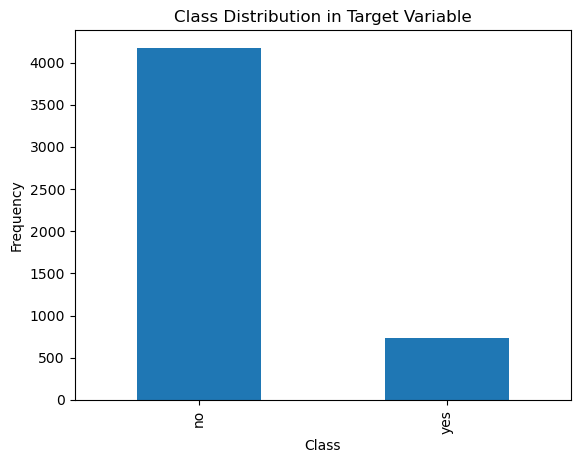

In [68]:
# Get value counts
target_counts = data['ARI'].value_counts()
print("Value Counts:\n", target_counts)

# Calculate proportions
target_proportions = data['ARI'].value_counts(normalize=True)
print("\nProportions:\n", target_proportions)

# Visualize the distribution
target_counts.plot(kind='bar')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [69]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(numeric_columns)

Numeric columns:
Index(['water', 'Type of place of residence', 'Highest eduction level',
       'Household has electricity', 'Wealth index combined',
       'Current breastfeeding', 'Sex of child', 'Child lives with whom',
       'Type of cooking fuel', 'Type of toilet facility', 'Occupation', 'Drug',
       'Number of living children', 'Had diarrhea',
       'Duration of breastfeeding', 'Vitamin A supplement', 'Age of child',
       'stunting', 'wasting'],
      dtype='object')


In [70]:
# Identify categorical or string columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical or string columns:")
print(categorical_columns)


Categorical or string columns:
Index(['ARI'], dtype='object')


In [71]:
unique_values = data['ARI'].unique()

# Print unique values
print(unique_values)

['no' 'yes']


In [72]:
 #Create a dictionary to map the values
ARI_mapping = {
   'no': 0,
   'yes': 1,
}

# Create a new column 'Vitamin A supplement' with the mapped values
data['ARI'] = data['ARI'].map(ARI_mapping)

# Print the first few rows to verify the new column
print(data.head())


   ARI  water  Type of place of residence  Highest eduction level  \
0    0      0                           2                       3   
1    0      0                           2                       1   
2    0      2                           2                       2   
4    0      0                           2                       1   
8    0      0                           2                       2   

   Household has electricity  Wealth index combined  Current breastfeeding  \
0                          0                      1                      1   
1                          0                      1                      1   
2                          2                      2                      1   
4                          0                      1                      1   
8                          0                      1                      1   

   Sex of child  Child lives with whom  Type of cooking fuel  \
0             1                    0.0              

# correlation matrix

In [73]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Identify columns with very low correlation
low_correlation_threshold = 0.1
low_correlation_columns = [col for col in correlation_matrix.columns if all(abs(correlation_matrix[col]) < low_correlation_threshold)]

# Function to check imbalance for categorical columns
def check_imbalance(series, imbalance_threshold=0.9):
    counts = series.value_counts(normalize=True)
    return any(counts > imbalance_threshold)

# Identify highly imbalanced columns
imbalance_threshold = 0.9
imbalanced_columns = [col for col in data.columns if check_imbalance(data[col], imbalance_threshold)]

# Identify columns to drop due to low correlation or high imbalance
columns_to_drop = set(low_correlation_columns).union(set(imbalanced_columns))

# Drop the identified columns
data = data.drop(columns=columns_to_drop)

# Print dropped columns
print("Dropped columns due to low correlation or high imbalance:")
print(columns_to_drop)



Dropped columns due to low correlation or high imbalance:
{'Had diarrhea', 'Child lives with whom', 'Number of living children', 'wasting'}


<Axes: >

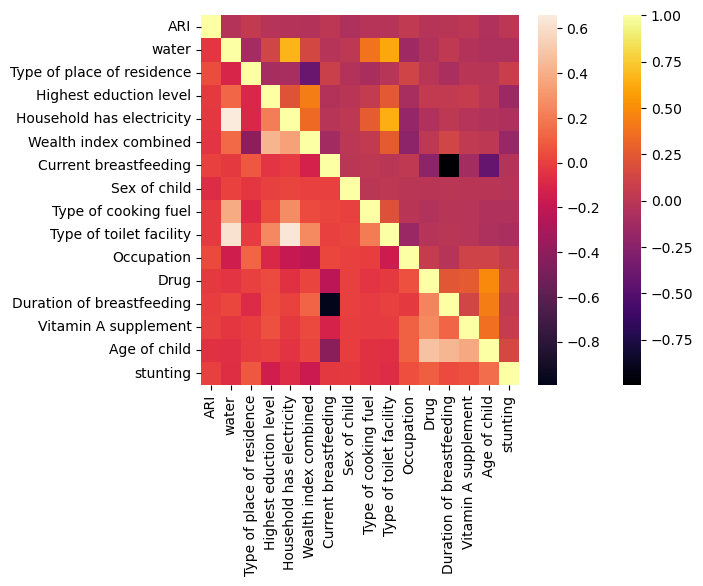

In [74]:
# compute the correlation among the variables
data.corr()

#see the correlation heatmap
sns.heatmap(data.corr(), cmap='inferno') #Very good correlation 

corr= data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr))

# using the upper triangle matrix as mask 
sns.heatmap(data.corr(), mask=matrix)

In [75]:
#Defining the outcome variable and the independent variables/ARI in our case
X= data.drop(["ARI"], axis = 1)
Y= data["ARI"]

# Train/Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#From the resampling comparision file, we can see that neear miss undersampling performed relatively better and we used it to develope the model used in this study
#Nearmiss undersampling
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(x_train, y_train)

#set the resampled dataset for experiment
x_train, x_test, y_train, y_test = train_test_split(X_train_nearmiss, y_train_nearmiss, test_size = 0.2, random_state = 42)

# see the shape of the resampled dataset
print("x_train : ",x_train.shape)

print("x_test : ",x_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

# Convert the arrays or DataFrames to DataFrames if needed
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)


x_train :  (929, 15)
x_test :  (233, 15)
y_train :  (929,)
y_test :  (233,)


# resampling

In [76]:
# Baseline Model training with the raw dataset
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)

from sklearn.metrics import classification_report
baseline_prediction = clf.predict(x_test)

# Check the model performance
print('Baseline prediction-RandomForestClassifier')
print(classification_report(y_test, baseline_prediction))

#we will try 3 methods and choose the best one

#option one- Random oversampler/ Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)

# Check the number of records after over sampling
from collections import Counter
print(sorted(Counter(y_train_ros).items()))

# Convert the resampled data to a pandas DataFrame
resampled_df = pd.DataFrame(X_train_ros, columns=X.columns)
resampled_df['outcomevar'] = y_train_ros

#fit the resampled data
ros_model = clf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(x_test)

# Check the model performance
print('Random Oversampling')
print(classification_report(y_test, ros_prediction)) # 40 % increase in recall

print("X_train_ros shape:", X_train_ros.shape)
print("x_test shape:", x_test.shape)

# SMOTE: Randomly over sample the minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

smote_model = clf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(x_test)

# Check the model performance
print('SMOTE')
print(classification_report(y_test, smote_prediction)) # recall increase to 61% but also accuracy down to 64%

#now try nearmiss undersampling
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(x_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))

nearmiss_model = clf.fit(X_train_nearmiss, y_train_nearmiss)
nearmiss_prediction = nearmiss_model.predict(x_test)

# Check the model performance
print('nearmiss undersampling')
print(classification_report(y_test, nearmiss_prediction)) #recall 80%

# Randomly under sample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(x_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

rus_model = clf.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(x_test)

# Check the model performance
print('Random Under-sampling')
print(classification_report(y_test, rus_prediction))

Baseline prediction-RandomForestClassifier
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       120
           1       0.76      0.53      0.63       113

    accuracy                           0.69       233
   macro avg       0.71      0.69      0.68       233
weighted avg       0.71      0.69      0.68       233

[(0, 468), (1, 468)]
Random Oversampling
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       120
           1       0.77      0.53      0.63       113

    accuracy                           0.70       233
   macro avg       0.71      0.69      0.69       233
weighted avg       0.71      0.70      0.69       233

X_train_ros shape: (936, 15)
x_test shape: (233, 15)
[(0, 468), (1, 468)]
SMOTE
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       120
           1       0.77      0.51      0.62       113

    accuracy      

# Model training

In [77]:
# Model training~baseline model train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)

from sklearn.metrics import classification_report
baseline_prediction = clf.predict(x_test)

# Check the model performance
print(classification_report(y_test, baseline_prediction))

#Baseline Model hyperparameter tuning was done but no significant difference observed.
# Define the Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4,6,8, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}


# Define the K-Fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Grid Search with K-Fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=kf)
grid_search.fit(X, Y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 150, random_state = 42).fit(x_train, y_train)
tuned_baseline_prediction = rf_tuned.predict(x_test)

# Check the model performance
print(classification_report(y_test, tuned_baseline_prediction))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       120
           1       0.76      0.53      0.63       113

    accuracy                           0.69       233
   macro avg       0.71      0.69      0.68       233
weighted avg       0.71      0.69      0.68       233

Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Best score:  0.8499609450267585
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       120
           1       0.76      0.52      0.62       113

    accuracy                           0.69       233
   macro avg       0.70      0.68      0.68       233
weighted avg       0.70      0.69      0.68       233



              precision    recall  f1-score   support

           0       0.62      0.86      0.72        98
           1       0.72      0.41      0.53        87

    accuracy                           0.65       185
   macro avg       0.67      0.64      0.62       185
weighted avg       0.67      0.65      0.63       185

Sensitivity: 0.41379310344827586
Specificity: 0.8571428571428571


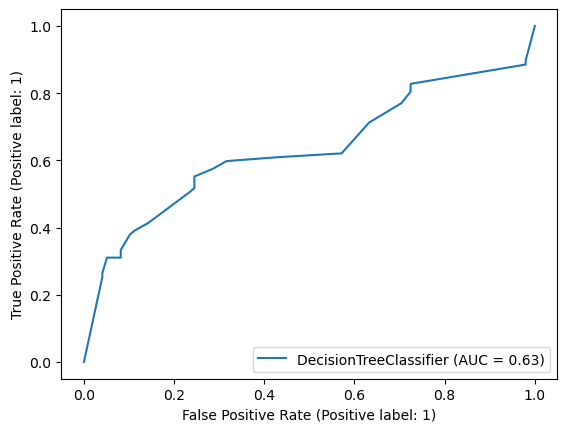

In [78]:
# Model 1: DT (Decision Tree)

x_train, x_test, y_train, y_test = train_test_split(X_train_nearmiss, y_train_nearmiss, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

#Grid search (already done)  and training
dtc_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2,  random_state= 42)
#fit the model
dtc_tuned.fit(x_train, y_train)
#predict
dtc_pred= dtc_tuned.predict(x_test)
print(classification_report(y_test, dtc_pred))

#see the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, dtc_pred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, dtc_pred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

#see the roc curve
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dtc_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        98
           1       0.73      0.70      0.71        87

    accuracy                           0.74       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.73      0.74      0.73       185

Sensitivity: 0.7011494252873564
Specificity: 0.7653061224489796


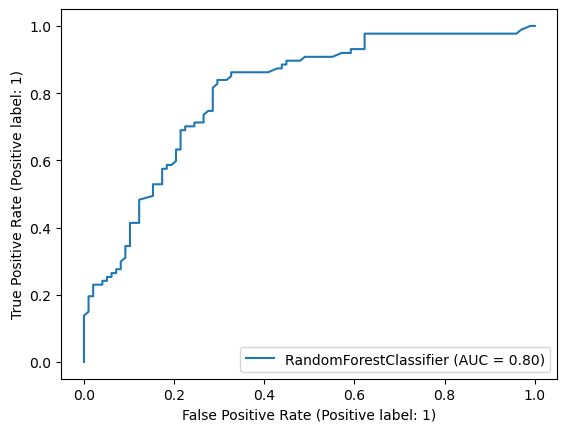

In [79]:
# Model 2: RF (Random Forest)

#Grid search (done already) and Train RF
from sklearn.ensemble import RandomForestClassifier
rfc_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 50, random_state = 42)
rfc_tuned.fit(x_train, y_train)

rfc_pred= rfc_tuned.predict(x_test)
print(classification_report(y_test, rfc_pred))

cm = confusion_matrix(y_test, rfc_pred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, rfc_pred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rfc_tuned, x_test, y_test)
plt.show()


              precision    recall  f1-score   support

           0       0.56      0.65      0.60        98
           1       0.51      0.41      0.46        87

    accuracy                           0.54       185
   macro avg       0.54      0.53      0.53       185
weighted avg       0.54      0.54      0.53       185

Sensitivity: 0.41379310344827586
Specificity: 0.6530612244897959


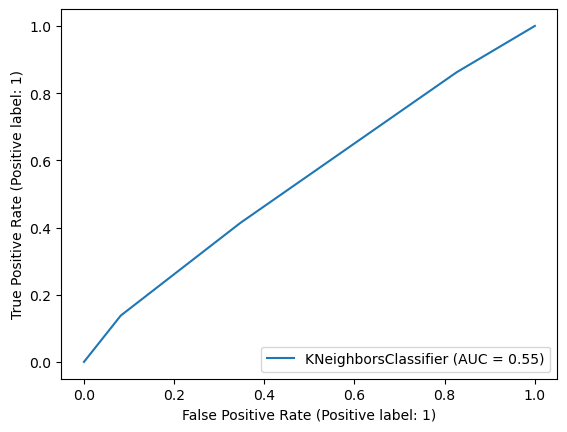

In [80]:
# Model 3: KNN (K nearest Neighbors)

#KNN Model grid search (done) and training
# Create a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
KNN_tuned = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
KNN_tuned.fit(x_train, y_train)

# Predict the output for the test data
KNNpred = KNN_tuned.predict(x_test)

print(classification_report(y_test, KNNpred))

cm = confusion_matrix(y_test, KNNpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, KNNpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(KNN_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.66      0.69        98
           1       0.65      0.70      0.67        87

    accuracy                           0.68       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.68      0.68      0.68       185

Sensitivity: 0.7011494252873564
Specificity: 0.6632653061224489


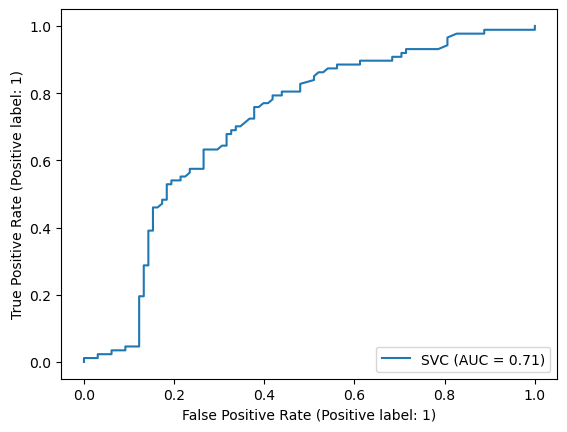

In [81]:
# Model 4: SVM (Support vector machine)

#SVM gride search (done) and model training
from sklearn.svm import SVC
svc_tuned = SVC(probability=True, C= 1, gamma= 1, kernel= 'rbf')
svc_tuned.fit(x_train, y_train)

svc_pred= svc_tuned.predict(x_test)
print(classification_report(y_test, svc_pred))

cm = confusion_matrix(y_test, svc_pred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, svc_pred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(svc_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        98
           1       0.74      0.59      0.65        87

    accuracy                           0.71       185
   macro avg       0.71      0.70      0.70       185
weighted avg       0.71      0.71      0.70       185

Sensitivity: 0.5862068965517241
Specificity: 0.8163265306122449


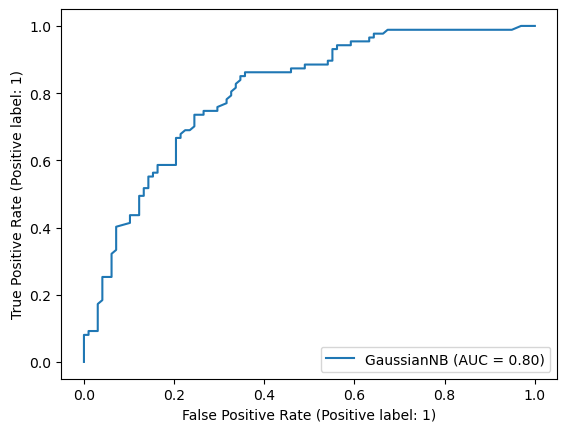

In [82]:
# Model 5: NB (Nieve bays)

#NB grid search (done) and model training
from sklearn.naive_bayes import GaussianNB
nb_tuned = GaussianNB(var_smoothing= 0.008111308307896872)
nb_tuned.fit(x_train, y_train)

Nbpred = nb_tuned.predict(x_test)

print(classification_report(y_test, Nbpred))

cm = confusion_matrix(y_test, Nbpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, Nbpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(nb_tuned, x_test, y_test)
plt.show()


              precision    recall  f1-score   support

           0       0.75      0.68      0.72        98
           1       0.68      0.75      0.71        87

    accuracy                           0.71       185
   macro avg       0.71      0.72      0.71       185
weighted avg       0.72      0.71      0.71       185

Sensitivity: 0.7471264367816092
Specificity: 0.6836734693877551


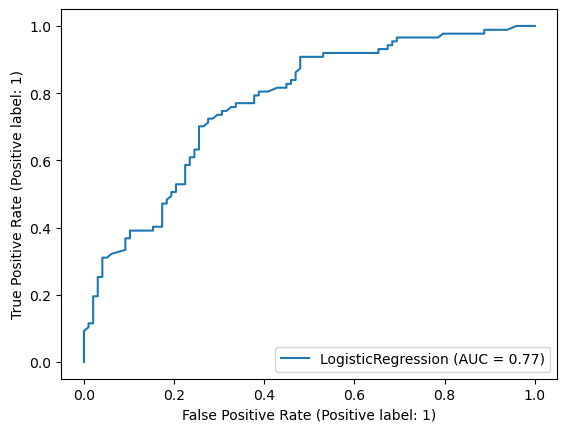

In [83]:
# Model 6: LR (Logistic regression)

#LR grid search (done) and model training
from sklearn.linear_model import LogisticRegression
lr_tuned = LogisticRegression(C=10, penalty = 'l2')
lr_tuned.fit(x_train, y_train)

# Predict the output for the test data
LRpred = lr_tuned.predict(x_test)
print(classification_report(y_test, LRpred))

cm = confusion_matrix(y_test, LRpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LRpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(lr_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.72      0.70        98
           1       0.66      0.60      0.63        87

    accuracy                           0.66       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.66      0.66      0.66       185

Sensitivity: 0.5977011494252874
Specificity: 0.7244897959183674


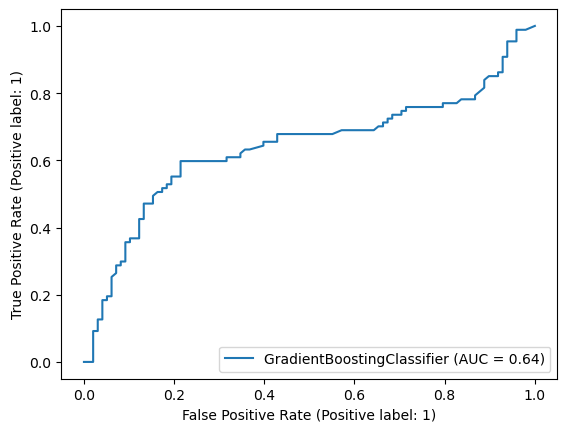

In [84]:
# Model 7: GB (Gradiant boosting)

#GB grid search (done) and model training
from sklearn.ensemble import GradientBoostingClassifier
gb_tuned = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gb_tuned.fit(x_train, y_train)

# Make predictions on the test set
GBpred = gb_tuned.predict(x_test)

# Print the classification report
print(classification_report(y_test, GBpred))

cm = confusion_matrix(y_test, GBpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, GBpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gb_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        98
           1       0.74      0.69      0.71        87

    accuracy                           0.74       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.74      0.74      0.74       185

Sensitivity: 0.6896551724137931
Specificity: 0.7857142857142857


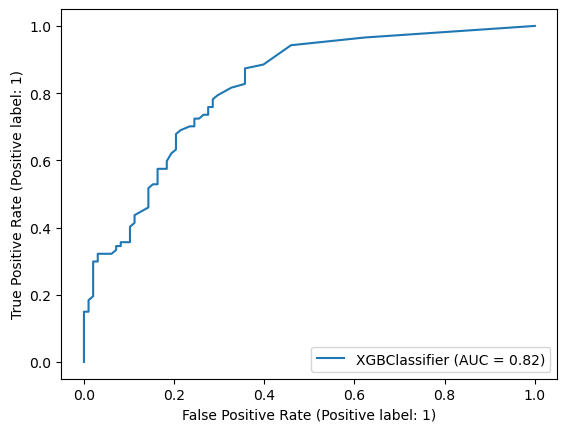

In [85]:
# Model 8: XGB (eXtreme gradiant boosting)

#XGB grid search(done) and model training
get_ipython().system('pip install xgboost')
from xgboost import XGBClassifier
xgb_tuned=XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 200)
xgb_tuned.fit(x_train, y_train)

XGBpred= xgb_tuned.predict(x_test)
print(classification_report(y_test, XGBpred))

cm = confusion_matrix(y_test, XGBpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, XGBpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(xgb_tuned, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.69      0.72        98
           1       0.68      0.72      0.70        87

    accuracy                           0.71       185
   macro avg       0.71      0.71      0.71       185
weighted avg       0.71      0.71      0.71       185

Sensitivity: 0.7241379310344828
Specificity: 0.6938775510204082


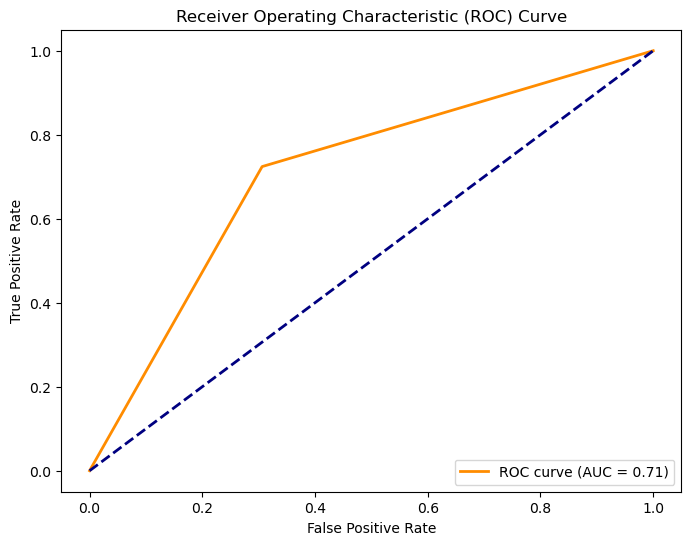

In [86]:
# Model 9: LAssoR (Lasso regression)

#LassoR grid search (done) and model training
from sklearn.linear_model import LassoCV
lasso_tuned = LassoCV(cv=5, eps=0.01, n_alphas= 50)
lasso_tuned.fit(x_train, y_train)

# Make predictions on the test set
LAsopred = lasso_tuned.predict(x_test).round()
print(classification_report(y_test, LAsopred))

cm = confusion_matrix(y_test, LAsopred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LAsopred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, LAsopred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       363
           1       0.91      0.75      0.82       374

    accuracy                           0.83       737
   macro avg       0.85      0.84      0.83       737
weighted avg       0.85      0.83      0.83       737



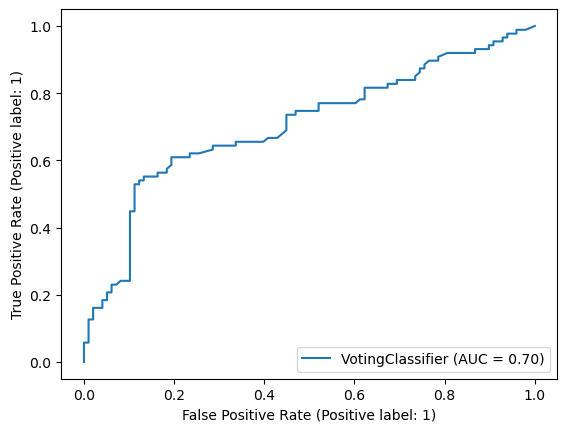

Sensitivity: 0.6551724137931034
Specificity: 0.7142857142857143


In [90]:
# Model 10: Ensemble Learning 

# Import required libraries
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('svm',svc_tuned ), ('gb', gb_tuned), ('xgb', xgb_tuned)], voting='soft')

# Fit the ensemble model to the data
ensemble_model.fit(x_train, y_train)

# Predict the target variable
y_pred_ensemble = ensemble_model.predict(x_train)

print(classification_report(y_train, y_pred_ensemble))

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(ensemble_model, x_test, y_test)
plt.show()

# Ensure the predictions have the same number of samples
min_samples = min(len(svc_pred), len(GBpred), len(XGBpred))
svm_predictions = svc_pred[:min_samples]
xg_predictions = GBpred[:min_samples]
xgb_predictions = XGBpred[:min_samples]
y_test = y_test[:min_samples]

ensemble_predictions = []
for i in range(len(y_test)):
    # Majority voting
    votes = svc_pred[i] + GBpred[i] + XGBpred[i]
    ensemble_predictions.append(1 if votes >= 2 else 0)

cm = confusion_matrix(y_test, ensemble_predictions)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, ensemble_predictions)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

              precision    recall  f1-score   support

           0       0.71      0.66      0.69        98
           1       0.65      0.70      0.67        87

    accuracy                           0.68       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.68      0.68      0.68       185



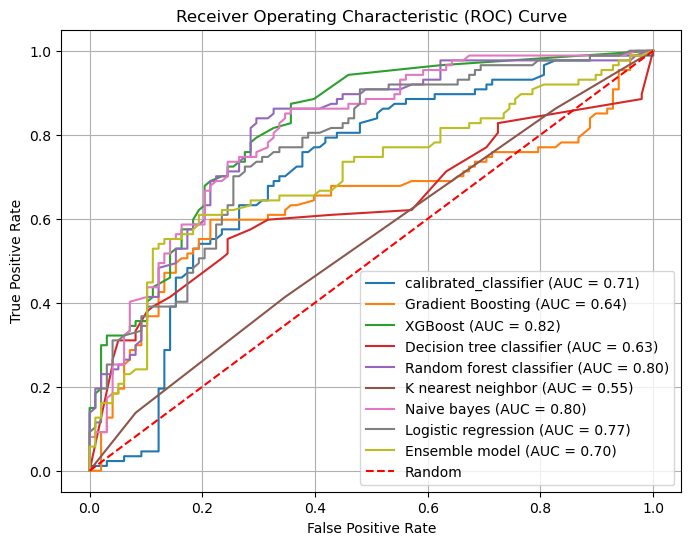

In [91]:
#So, the ensemble prediction provided the best model.
#plot all the roc curves in one plot
# Compute the ROC curve and AUC for each model
dt_probablities = dtc_tuned.predict_proba(x_test)[:, 1]
rf_probablities = rfc_tuned.predict_proba(x_test)[:, 1]
knn_probablities = KNN_tuned.predict_proba(x_test)[:, 1]
nb_probablities = nb_tuned.predict_proba(x_test)[:, 1]
lr_probablities = lr_tuned.predict_proba(x_test)[:, 1]
svm_probabilities = svc_tuned.predict_proba(x_test)[:, 1]
xg_probabilities = gb_tuned.predict_proba(x_test)[:, 1]
xgb_probabilities = xgb_tuned.predict_proba(x_test)[:, 1]
ensemble_probablities = ensemble_model.predict_proba(x_test)[:, 1]
#lasso_probablities = lasso_tuned.predict_proba(x_test) [:, 1]

y_pred = svc_tuned.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Compute the ROC curve and AUC for each model
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probabilities)
svm_auc = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probablities )
dt_auc = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probablities)
rf_auc = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probablities)
knn_auc = auc(knn_fpr, knn_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probablities)
nb_auc = auc(nb_fpr, nb_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probablities)
lr_auc = auc(lr_fpr, lr_tpr)

xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probabilities)
xg_auc = auc(xg_fpr, xg_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)
xgb_auc = auc(xgb_fpr, xgb_tpr)

ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probablities)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label='calibrated_classifier (AUC = {:.2f})'.format(svm_auc))
plt.plot(xg_fpr, xg_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(xg_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision tree classifier (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random forest classifier (AUC = {:.2f})'.format(rf_auc))
plt.plot(knn_fpr, knn_tpr, label='K nearest neighbor (AUC = {:.2f})'.format(knn_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(lr_fpr, lr_tpr, label='Logistic regression (AUC = {:.2f})'.format(lr_auc))
plt.plot(ensemble_fpr, ensemble_tpr, label='Ensemble model (AUC = {:.2f})'.format(ensemble_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

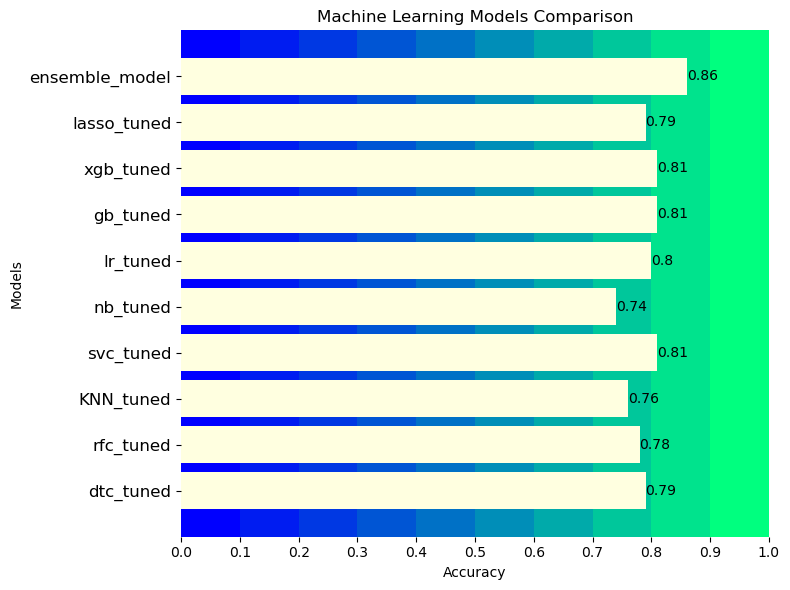

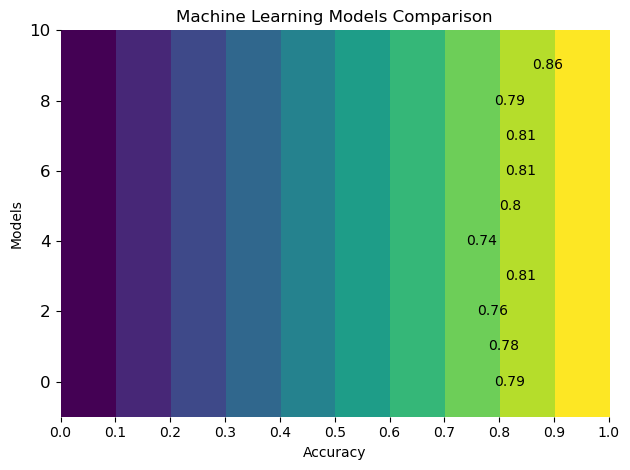

In [92]:
# List of model names and their corresponding accuracy scores
model_names = ['dtc_tuned', 'rfc_tuned', 'KNN_tuned', 'svc_tuned', 'nb_tuned', 'lr_tuned', 'gb_tuned', 'xgb_tuned', 'lasso_tuned', 'ensemble_model']
accuracy_scores = [0.79, 0.78, 0.76, 0.81, 0.74, 0.80, 0.81, 0.81, 0.79, 0.86]

# Set colors for the bars
colors = ['lightyellow']

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracy_scores, color=colors)
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison')

# Add data values to the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='winter', extent=(0, 1, -1, len(model_names)))
# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison')

# Add data values to the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='viridis', extent=(0, 1, -1, len(model_names)))

# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


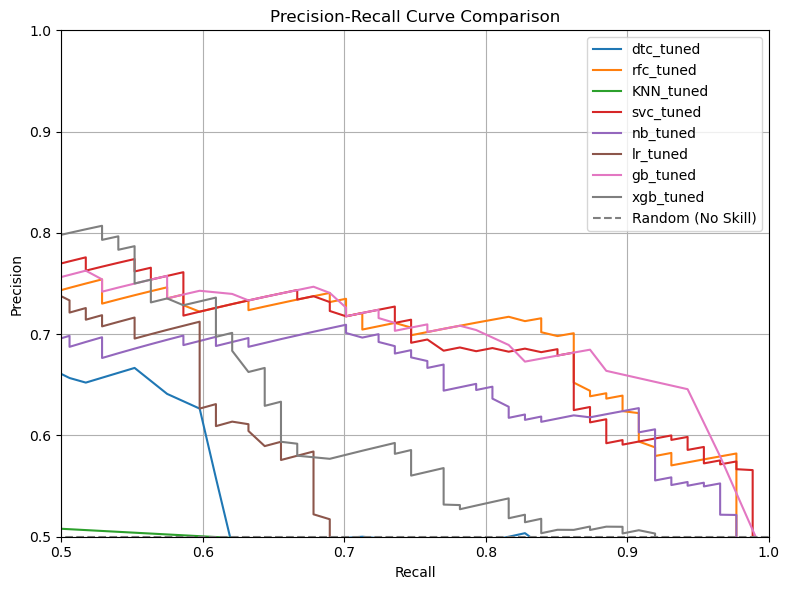

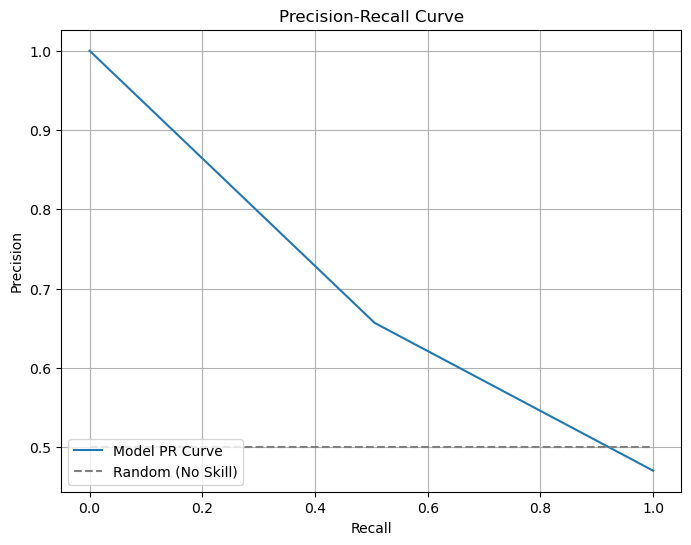

In [93]:
# List of model names and their predicted probabilities or decision scores
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
model_names = ['dtc_tuned', 'rfc_tuned', 'KNN_tuned', 'svc_tuned', 'nb_tuned', 'lr_tuned', 'gb_tuned', 'xgb_tuned', 'ensemble_model']

# Generate random predictions for the random (no skill) model
y_pred_random = np.random.choice([0, 1], size=len(y_train_nearmiss))

# Calculate precision and recall for the random model
precision_random, recall_random, _ = precision_recall_curve(y_train_nearmiss, y_pred_random)

#plot the PR curve
models= [dtc_tuned, rfc_tuned, KNN_tuned, nb_tuned, lr_tuned, gb_tuned, xgb_tuned, ensemble_model]
# Calculate the Random (No Skill) PR curve
positive_rate = np.sum(y_train_nearmiss) / len(y_train_nearmiss)
recall_random = np.linspace(0, 1, num=100)
precision_random = np.repeat(positive_rate, 100)

# Plot PR curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in zip(model_names, models):
    # Generate model predictions or decision scores for the test set
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # Plot the PR curve for each model
    plt.plot(recall, precision, label=model_name)

# Plot the Random (No Skill) PR curve
plt.plot(recall_random, precision_random, linestyle='--', color='grey', label='Random (No Skill)')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')

# Customize the appearance
plt.legend()
plt.grid(True)
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])

# Show the plot
plt.tight_layout()
plt.show()

# Get predicted probabilities for the positive class and binary prediction based on a 0.5 treshold (class 1)
dt_probablities = (dt_probablities >= 0.5).astype(int)
rf_probablities = (rf_probablities >= 0.5).astype(int)
knn_probablities = (knn_probablities >= 0.5).astype(int)
nb_probablities = (nb_probablities >= 0.5).astype(int)
lr_probablities = (lr_probablities >= 0.5).astype(int)
svm_probabilities = (svm_probabilities >= 0.5).astype(int)
xg_probabilities = (xg_probabilities >= 0.5).astype(int)
xgb_probabilities= (xgb_probabilities >= 0.5).astype(int)
ensemble_probablities = (ensemble_probablities >= 0.5).astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, dt_probablities)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Model PR Curve')
plt.plot([0, 1], [positive_rate, positive_rate], linestyle='--', color='grey', label='Random (No Skill)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

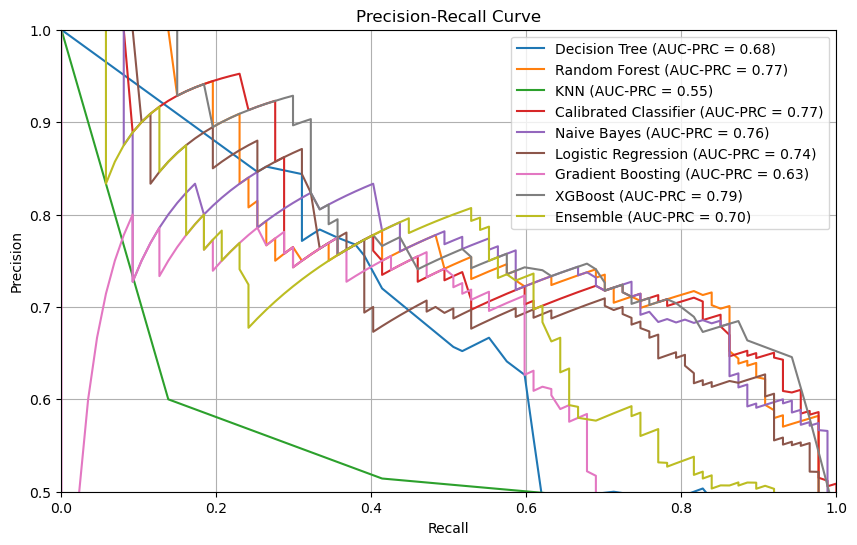

In [94]:
#the cvm needs calibration
# Train the SVM model with probability=True to enable Platt scaling
from sklearn.svm import SVC
svc_new = SVC(probability=True)
svc_new.fit(x_train, y_train)

# Calibrate the classifier to obtain probability estimates
from sklearn.calibration import CalibratedClassifierCV
calibrated_classifier = CalibratedClassifierCV(svc_new, method='sigmoid', cv='prefit')
calibrated_classifier.fit(x_train, y_train)

# Get predicted probabilities for the positive class (class 1)
svm_new_pred = calibrated_classifier.predict_proba(x_test)[:, 1]

# Define your trained models
models = [dtc_tuned, rfc_tuned, KNN_tuned, calibrated_classifier, nb_tuned, lr_tuned, gb_tuned, xgb_tuned, ensemble_model]
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'Calibrated Classifier', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'Ensemble']

# Plot AUC-PRC for each model
plt.figure(figsize=(10, 6))
for model, name in zip(models, model_names):
    # Generate model predictions or decision scores for the test set
    y_score = model.predict_proba(x_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # Calculate AUC-PRC
    auc_prc = auc(recall, precision)

    # Plot the PR curve for each model
    plt.plot(recall, precision, label=f'{name} (AUC-PRC = {auc_prc:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0.5, 1])
plt.show()

[(0, 461), (1, 461)]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       363
           1       0.91      0.73      0.81       374

    accuracy                           0.83       737
   macro avg       0.84      0.83      0.83       737
weighted avg       0.84      0.83      0.82       737

Sensitivity: 0.6896551724137931
Specificity: 0.7755102040816326


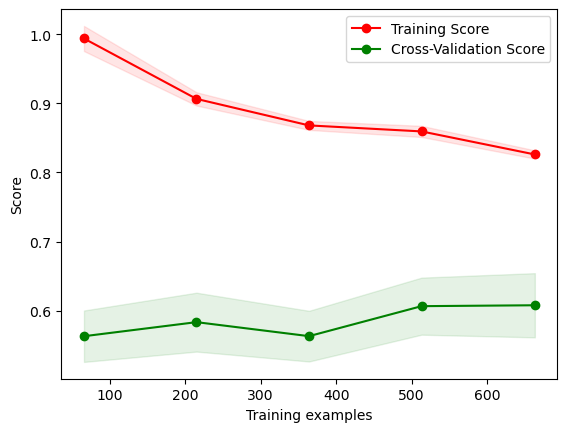

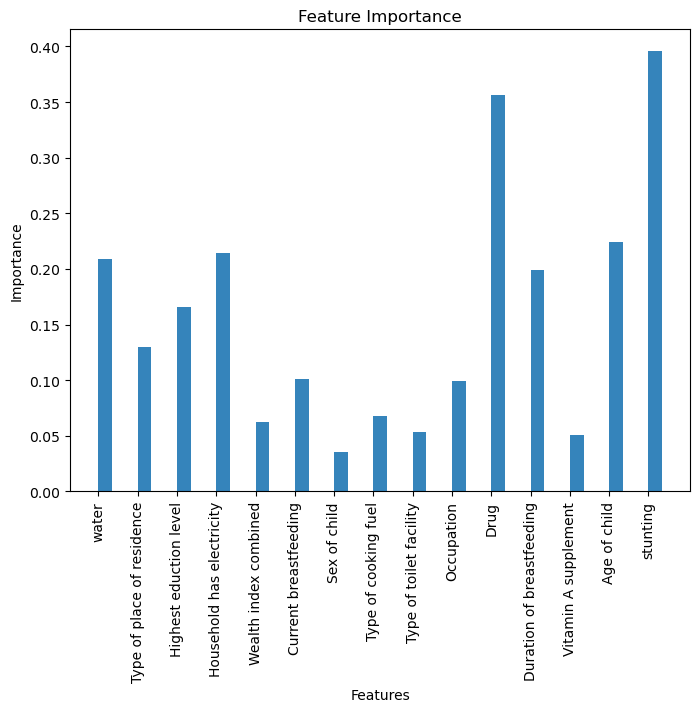

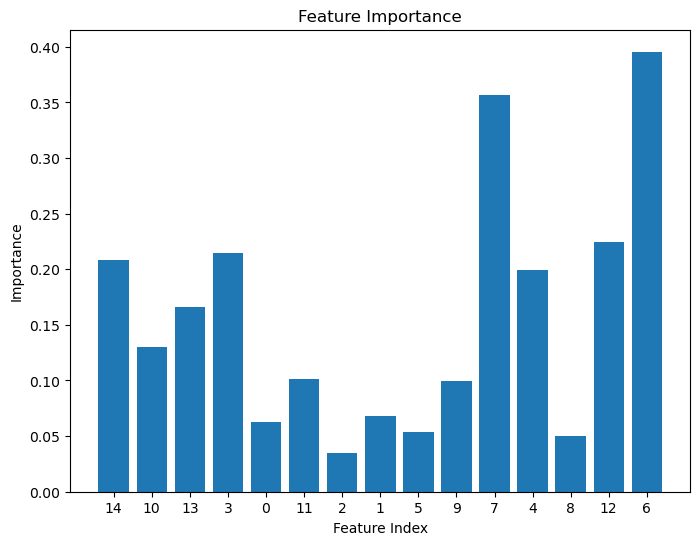

PermutationExplainer explainer: 186it [05:03,  1.68s/it]                                                               


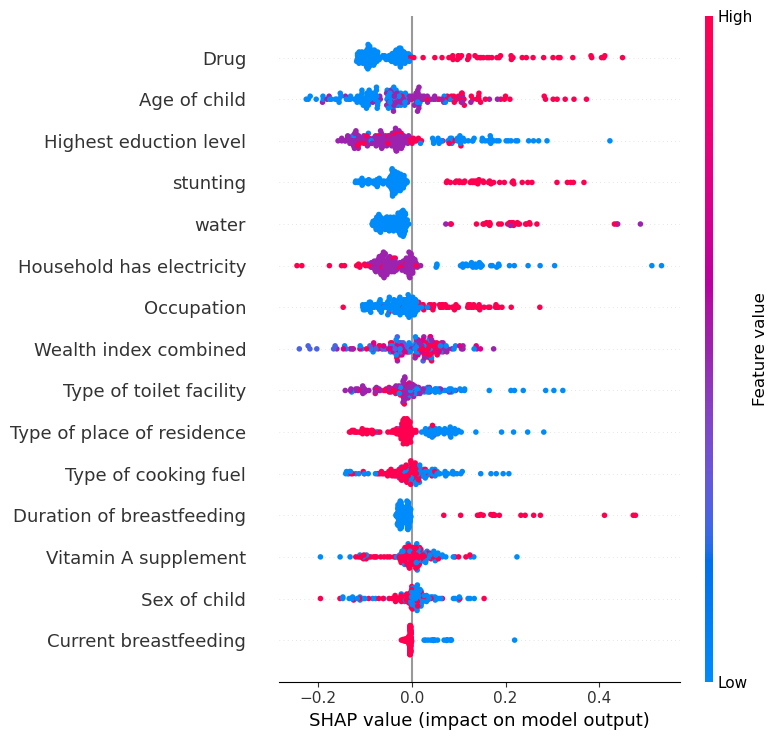

PermutationExplainer explainer: 186it [04:58,  1.67s/it]                                                               


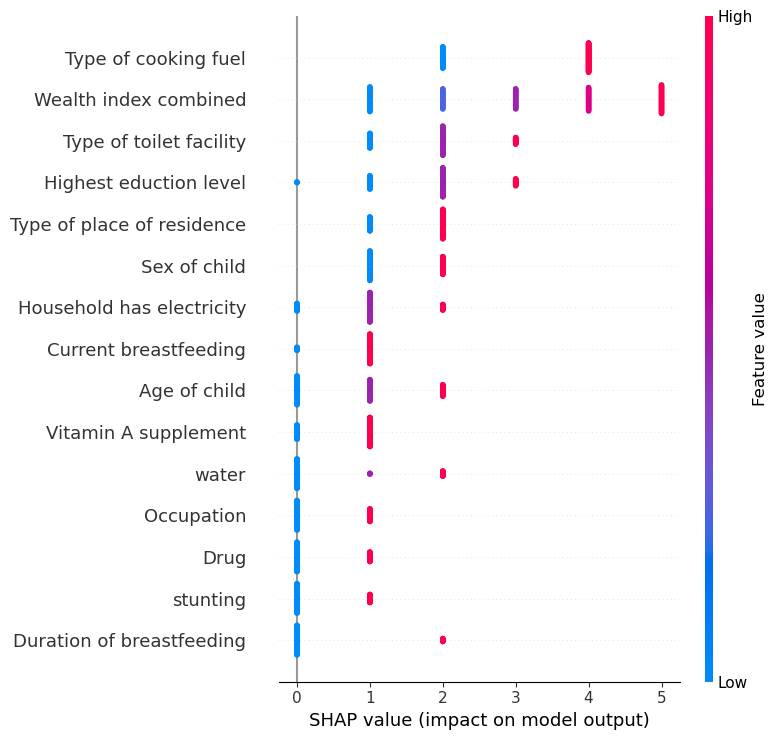

PermutationExplainer explainer: 186it [04:58,  1.67s/it]                                                               


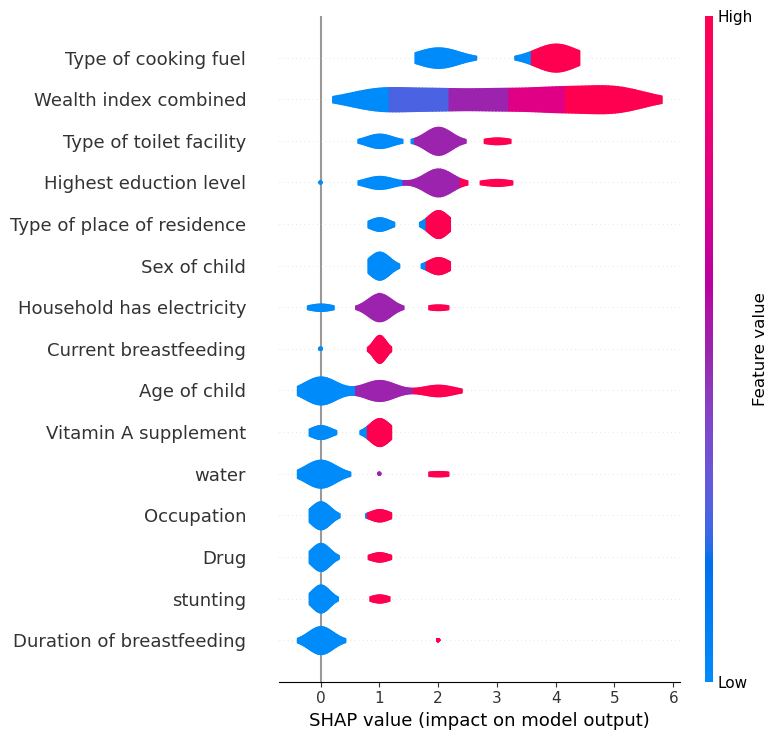

PermutationExplainer explainer: 186it [04:55,  1.65s/it]                                                               


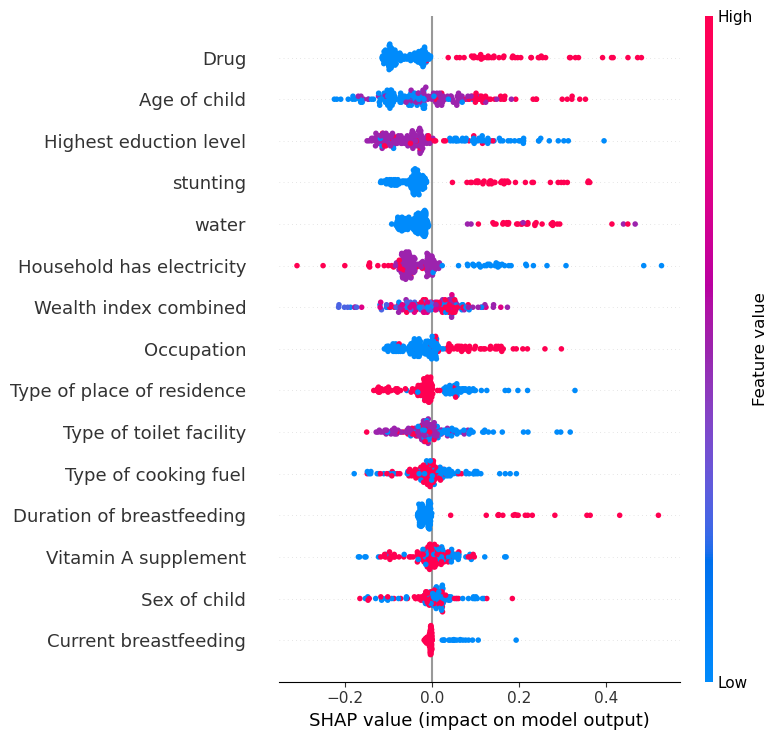

In [95]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary Libraries or install if not yet installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
os.chdir('..')
get_ipython().run_line_magic('matplotlib', 'inline')
import json
import glob

#we droped 3 variables for very low correlation and high imbalance
#data= data.drop('wasting', axis=1)
#data= data.drop('water', axis=1)
#data= data.drop('Vitamin A supplement', axis=1)


# Check the number of records after over sampling
from collections import Counter
print(sorted(Counter(y_train_nearmiss).items()))

#From the model comparision module, we identified that three models perform better (SVM, GB and XGB)
#Training the first model, SVM
#SVM gride search (done) and model training
from sklearn.svm import SVC
svc_tuned = SVC(probability=True, C= 1, gamma= 1, kernel= 'linear')
svc_tuned.fit(x_train, y_train)

svc_pred= svc_tuned.predict(x_test)

#Training the second model, GB
from sklearn.ensemble import GradientBoostingClassifier
gb_tuned = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gb_tuned.fit(x_train, y_train)

# Make predictions on the test set
GBpred = gb_tuned.predict(x_test)

#Training the third model, XGB
#XGB grid search(done) and model training
from xgboost import XGBClassifier
xgb_tuned=XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 200)
xgb_tuned.fit(x_train, y_train)
XGBpred= xgb_tuned.predict(x_test)

# Ensemling the models
# Import required libraries
from sklearn.ensemble import VotingClassifier


# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('svm',svc_tuned ), ('gb', gb_tuned), ('xgb', xgb_tuned)], voting='soft')

# Fit the ensemble model to the data
ensemble_model.fit(x_train, y_train)

# Predict the target variable
y_pred_ensemble = ensemble_model.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_ensemble))

# Ensure the predictions have the same number of samples
min_samples = min(len(svc_pred), len(GBpred), len(XGBpred))
svm_predictions = svc_pred[:min_samples]
xg_predictions = GBpred[:min_samples]
xgb_predictions = XGBpred[:min_samples]
y_test = y_test[:min_samples]

ensemble_predictions = []
for i in range(len(y_test)):
    # Majority voting
    votes = svc_pred[i] + GBpred[i] + XGBpred[i]
    ensemble_predictions.append(1 if votes >= 2 else 0)

# calculating the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, ensemble_predictions)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, ensemble_predictions)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Extract feature importances from the base classifiers
svm_feature_importances = np.abs(svc_tuned.coef_[0])
gb_feature_importances = gb_tuned.feature_importances_
xgb_feature_importances = xgb_tuned.feature_importances_

# Calculate average feature importance across the Gradient Boosting and XGBoost classifiers
ensemble_feature_importances = (gb_feature_importances + xgb_feature_importances + svm_feature_importances) / 3

# Sort feature importances in descending order
sorted_indices = np.argsort(ensemble_feature_importances)[::-1]
sorted_importances = ensemble_feature_importances[sorted_indices]
sorted_features = np.arange(X.shape[1])[sorted_indices]

sorted_features

ensemble_feature_importances

# Create a list of feature names
feature_names = X.columns
feature_names

feature_importances = pd.DataFrame(ensemble_feature_importances, index= feature_names)
feature_importances.head()

features = list(feature_importances [feature_importances[0]>0].index)
features

# Plot the feature importances
plt.figure( figsize=(8, 6))
plt.bar(np.arange(len(feature_names)), feature_importances[0], alpha=0.9, width=0.35, align='edge', label='Ensemble model')
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), ensemble_feature_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_features)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Plot the SHAP values
def model_predict(x_test):
    return ensemble_model.predict(x_test)

import shap
explainer = shap.Explainer(model_predict, x_test)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

#compute shap values
explainer = shap.Explainer(model_predict, x_test)
shap_values = explainer(x_test)

# Check if shap_values is a vector, and if so, convert it to a matrix
if len(shap_values.shape) == 1:
    shap_values = shap_values.reshape((-1, x_test.shape[1]))
    
shap.summary_plot(shap_values.data, x_test.values, feature_names = x_test.columns)
x_test.shape

#compute shap values
explainer = shap.Explainer(model_predict, x_test)
shap_values = explainer(x_test)

# Check if shap_values is a vector, and if so, convert it to a matrix
if len(shap_values.shape) == 1:
    shap_values = shap_values.reshape((-1, x_test.shape[1]))
    
shap.summary_plot(shap_values.data, x_test.values, feature_names = x_test.columns, plot_type = "violin")

#compute shap values
explainer = shap.Explainer(model_predict, x_test)
shap_values = explainer(x_test)

# Check if shap_values is a vector, and if so, convert it to a matrix
if len(shap_values.shape) == 1:
    shap_values = shap_values.reshape((-1, x_test.shape[1]))
    
shap.summary_plot(shap_values, x_test)